In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Downloadd\price.csv")
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df=df[["price","bedrooms","bathrooms","sqft_living","floors"]]
df.head()

,price,bedrooms,bathrooms,sqft_living,floors
0,221900.0,3,1.00,1180,1.0
1,538000.0,3,2.25,2570,2.0
2,180000.0,2,1.00,770,1.0
3,604000.0,4,3.00,1960,1.0
4,510000.0,3,2.00,1680,1.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1053.0,520384.062678,339590.040607,80000.0,310000.0,435000.0,628000.0,3080000.0
bedrooms,1053.0,3.344729,0.846522,0.0,3.0,3.0,4.0,7.0
bathrooms,1053.0,2.045584,0.718566,0.0,1.5,2.0,2.5,5.0
sqft_living,1053.0,2042.619183,880.733759,380.0,1410.0,1900.0,2450.0,6070.0
floors,1053.0,1.443495,0.514881,1.0,1.0,1.0,2.0,3.5


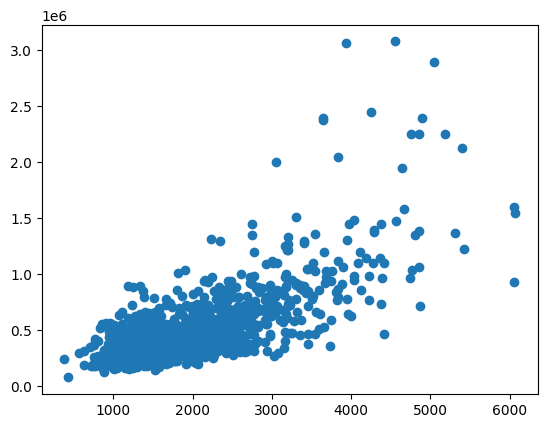

In [5]:
#linearity
plt.scatter(df.sqft_living,df.price)

<AxesSubplot: >

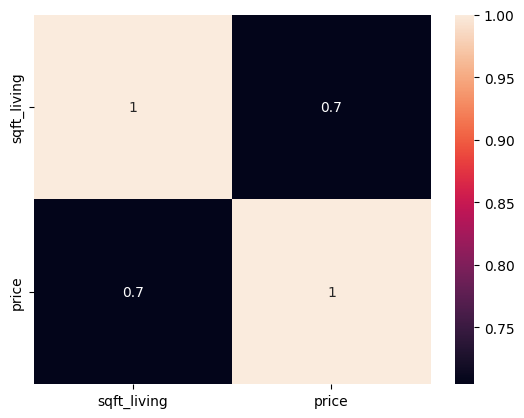

In [6]:
#correlation
sns.heatmap(df[["sqft_living","price"]].corr(),annot=True)

In [7]:
x=df[["sqft_living"]]
y=df[["price"]]
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [8]:
model.score(x,y)

0.49661528229119023

In [9]:
model.coef_

array([[271.71920881]])

In [10]:
model.intercept_

array([-34634.8057067])

In [11]:
y_pr=model.predict(x)
residuals= y-y_pr

In [12]:
import statsmodels.api as sm
x1=df[["sqft_living"]]
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1037.
Date:                Mon, 08 May 2023   Prob (F-statistic):          7.78e-159
Time:                        20:57:08   Log-Likelihood:                -14543.
No. Observations:                1053   AIC:                         2.909e+04
Df Residuals:                    1051   BIC:                         2.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.463e+04   1.88e+04     -1.845      0.065   -7.15e+04    2194.144
sqft_living   271.7192      8.438     32.200      0.000     255.161     288.277
==============================================================================
Omnibus:                      622.151   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9616.999
Skew:                           2.406   Prob(JB):                         0.00
Kurtosis:                      17.001   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

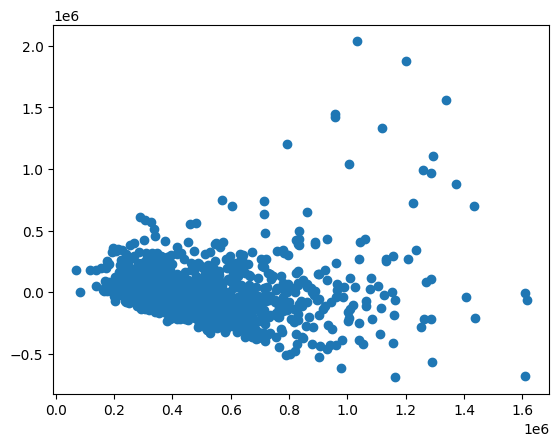

In [13]:
#Heteroscadasticity
res=np.array(residuals).flatten()
ype=np.array(y_pr).flatten()
import scipy.stats as stats
stats.levene(res,ype)
plt.scatter(y_pr,residuals)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
R2=r2_score(y,y_pr)
R2
#Multicollinearity
vif=1/(1-R2)
vif

1.9865521634259555

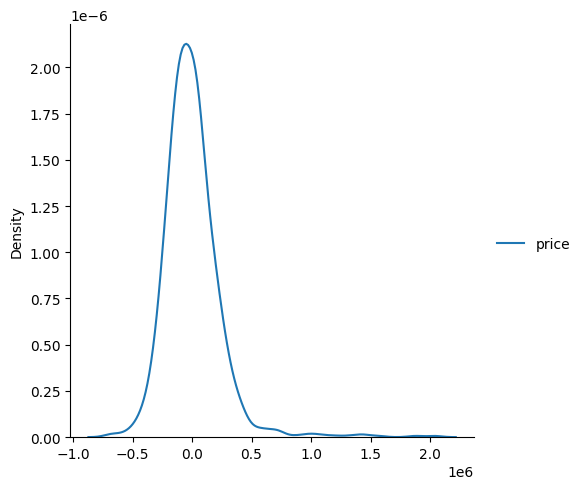

In [15]:
#Normalitity of residul
sns.displot(residuals,kind='kde')

[2.02255627]


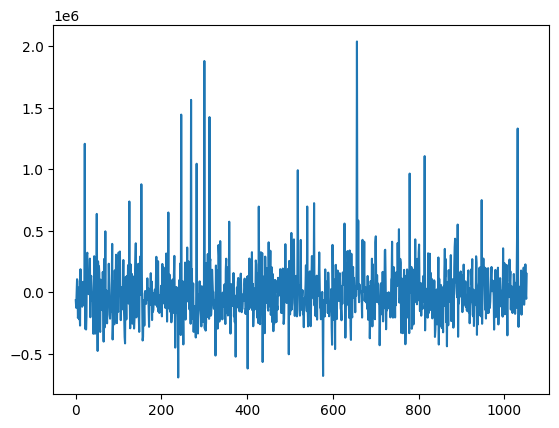

In [16]:
#Autocorrelation
plt.plot(residuals)
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals))